In [2]:
#Installing or importing basic libriaries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


In [4]:

#checking the original dataset
data=pd.read_csv("/Users/vladimirant/Desktop/FIFA PROJECT ML CLASS/players_20.csv")

In [5]:
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


In [6]:
data.shape

(18278, 104)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [8]:
attribute_names=data.columns.values.tolist()
attribute_names

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

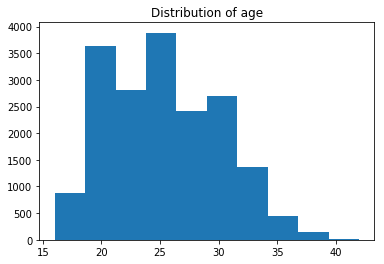

25.283291388554545

In [9]:
plt.title("Distribution of age")
plt.hist(data["age"])
plt.show()
np.mean(data["age"])


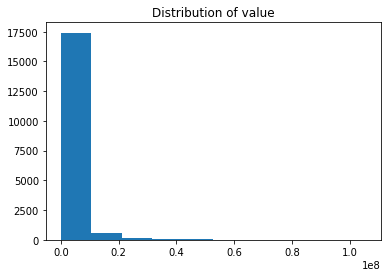

So we can see that the data is skewed and the mean is 2484037.640879746 EUR.
We need to standartize the data and probably take a logs. Also, we can see some 0 values
if taking the logs we should somehow to deal with the 0s


In [10]:
plt.title("Distribution of value")
plt.hist(data["value_eur"])
plt.show()
data["value_eur"]
np.mean(data["value_eur"])
mean_print=np.mean(data["value_eur"])
print("So we can see that the data is skewed and the mean is", mean_print,"EUR.")
print ("We need to standartize the data and probably take a logs. Also, we can see some 0 values")
print ("if taking the logs we should somehow to deal with the 0s")



In [11]:
#So, here we can see that there are 250 rows with 0 values
data.loc[data['value_eur']==0]
#So, now we creating dataset that does not contain 0 
data_cool=data.loc[data['value_eur']!=0]



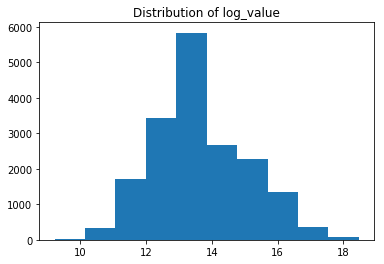

In [12]:
#Plotting histogram ro see the distribution of value_eur log
log_value=np.log(data_cool['value_eur'])
plt.title("Distribution of log_value")
plt.hist(log_value)
plt.show()



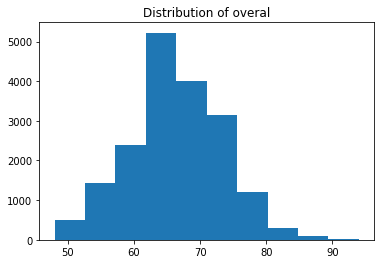

We can see that distrubution of the overal is pretty much normal and mean is 66.24499398183609


In [13]:
plt.title("Distribution of overal")
plt.hist(data["overall"])
plt.show()
np.mean(data["overall"])
mean_print_o=np.mean(data["overall"])
print("We can see that distrubution of the overal is pretty much normal and mean is",mean_print_o )




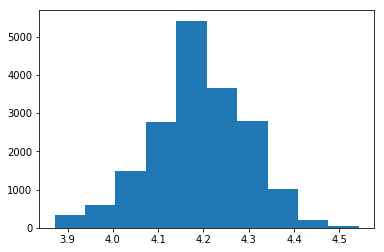

In [14]:
log_overall=np.log(data["overall"])
plt.hist(log_overall)
plt.show()

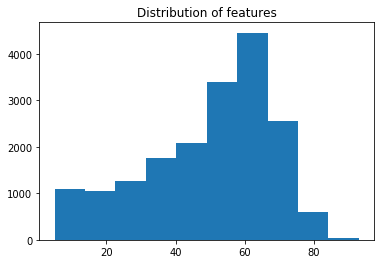

In [15]:
plt.title("Distribution of features")
plt.hist(data["attacking_crossing"])
plt.show()



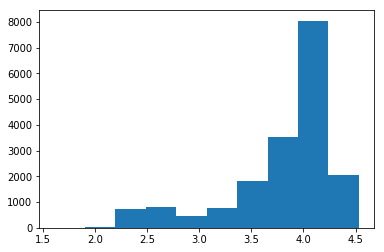

In [16]:
log_att_crossing=np.log(data["attacking_crossing"])
plt.hist(log_att_crossing)
plt.show()

In [17]:
data.loc[data['passing'] ==85]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
52,189509,https://sofifa.com/player/189509/thiago-alcant...,Thiago,Thiago Alcântara do Nascimento,28,1991-04-11,174,70,Spain,FC Bayern München,...,78+3,78+3,78+3,78+3,78+3,75+3,69+3,69+3,69+3,75+3
54,198219,https://sofifa.com/player/198219/lorenzo-insig...,L. Insigne,Lorenzo Insigne,28,1991-06-04,163,59,Italy,Napoli,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
129,162347,https://sofifa.com/player/162347/joao-filipe-m...,João Moutinho,João Filipe Iria Santos Moutinho,32,1986-09-08,170,61,Portugal,Wolverhampton Wanderers,...,74+3,77+3,77+3,77+3,74+3,72+3,70+3,70+3,70+3,72+3
270,192318,https://sofifa.com/player/192318/mario-gotze/2...,M. Götze,Mario Götze,27,1992-06-03,176,75,Germany,Borussia Dortmund,...,73+3,72+3,72+3,72+3,73+3,69+3,62+3,62+3,62+3,69+3
290,146562,https://sofifa.com/player/146562/santiago-cazo...,Santi Cazorla,Santiago Cazorla González,34,1984-12-13,168,65,Spain,Villarreal CF,...,70+3,72+3,72+3,72+3,70+3,68+3,65+3,65+3,65+3,68+3
509,175379,https://sofifa.com/player/175379/pedro-leon-sa...,Pedro León,Pedro León Sánchez Gil,32,1986-11-24,183,73,Spain,SD Eibar,...,63+2,63+2,63+2,63+2,63+2,58+2,51+2,51+2,51+2,58+2
603,205569,https://sofifa.com/player/205569/james-ward-pr...,J. Ward-Prowse,James Ward-Prowse,24,1994-11-01,173,66,England,Southampton,...,72+2,72+2,72+2,72+2,72+2,69+2,64+2,64+2,64+2,69+2


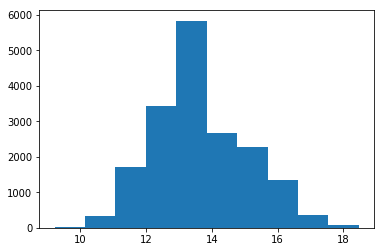

So after excluding 0-s and applying log to a data we can see that now distribution of log(value_eur) is ;ooks like normal


In [18]:
values_log=np.log(data_cool["value_eur"])
plt.hist(values_log)
plt.show()

np.mean(values_log)

print("So after excluding 0-s and applying log to a data we can see that now distribution of log(value_eur) is ;ooks like normal")


In [19]:
#Here I am deleting 0 values of Market Price
DATA=pd.read_excel("/Users/vladimirant/Desktop/FIFA PROJECT ML CLASS/FIFA DATA_FW_LIST.xlsx")
DATA=DATA.loc[DATA['value_eur']!=0]
#Here i am doing expiriment with taking logs of values-eur
DATA["value_eur"]=np.log(DATA["value_eur"])

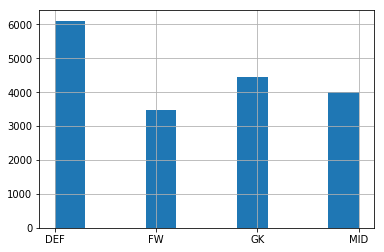

In [20]:
#the distribution of players by positions
DATA['Player class'].hist()
plt.show()

In [21]:
DATA_FOR_CALC=DATA[['age','Player class',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']]

In [22]:
#standartizing the data
DATA_FOR_CALC["age"]=DATA_FOR_CALC["age"]/42*99

DATA_FOR_CALC["height_cm"]=DATA_FOR_CALC["height_cm"]/205*99

DATA_FOR_CALC["weight_kg"]=DATA_FOR_CALC["weight_kg"]/110*99

DATA_FOR_CALC["international_reputation"]=DATA_FOR_CALC["international_reputation"]/5*99

DATA_FOR_CALC["skill_moves"]=DATA_FOR_CALC["skill_moves"]/5*99

DATA_FOR_CALC["weak_foot"]=DATA_FOR_CALC["weak_foot"]/5*99

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [23]:
DATA_FOR_CALC.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,international_reputation,weak_foot,skill_moves,pace,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,16032.000000,...,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000,18028.000000
mean,59.461897,87.584358,67.736133,66.205957,71.559463,13.661835,21.834036,58.269858,46.897049,67.719561,...,48.370424,58.495174,46.828378,47.626082,45.591358,16.510428,16.301143,16.160417,16.310462,16.657588
std,10.922733,3.262458,6.345637,6.953858,6.140816,1.398462,7.493077,13.158968,15.128024,11.284148,...,15.683408,11.855041,20.049283,21.555141,21.183823,17.660094,16.925791,16.553301,17.057334,17.968059
min,37.714286,75.336585,45.000000,48.000000,49.000000,9.210340,19.800000,19.800000,19.800000,24.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,51.857143,85.478049,63.000000,62.000000,67.000000,12.691580,19.800000,59.400000,39.600000,61.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,58.928571,87.409756,67.500000,66.000000,71.000000,13.493927,19.800000,59.400000,39.600000,69.000000,...,49.000000,59.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,68.357143,89.824390,72.000000,71.000000,75.000000,14.557448,19.800000,59.400000,59.400000,75.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,99.000000,99.000000,99.000000,94.000000,95.000000,18.474222,99.000000,99.000000,99.000000,96.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


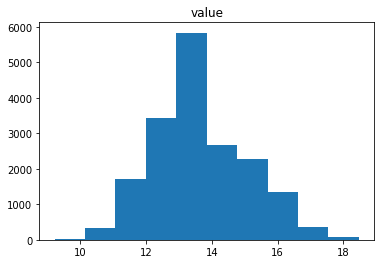

In [24]:
plt.title("value")
plt.hist(DATA_FOR_CALC["value_eur"])
plt.show()


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


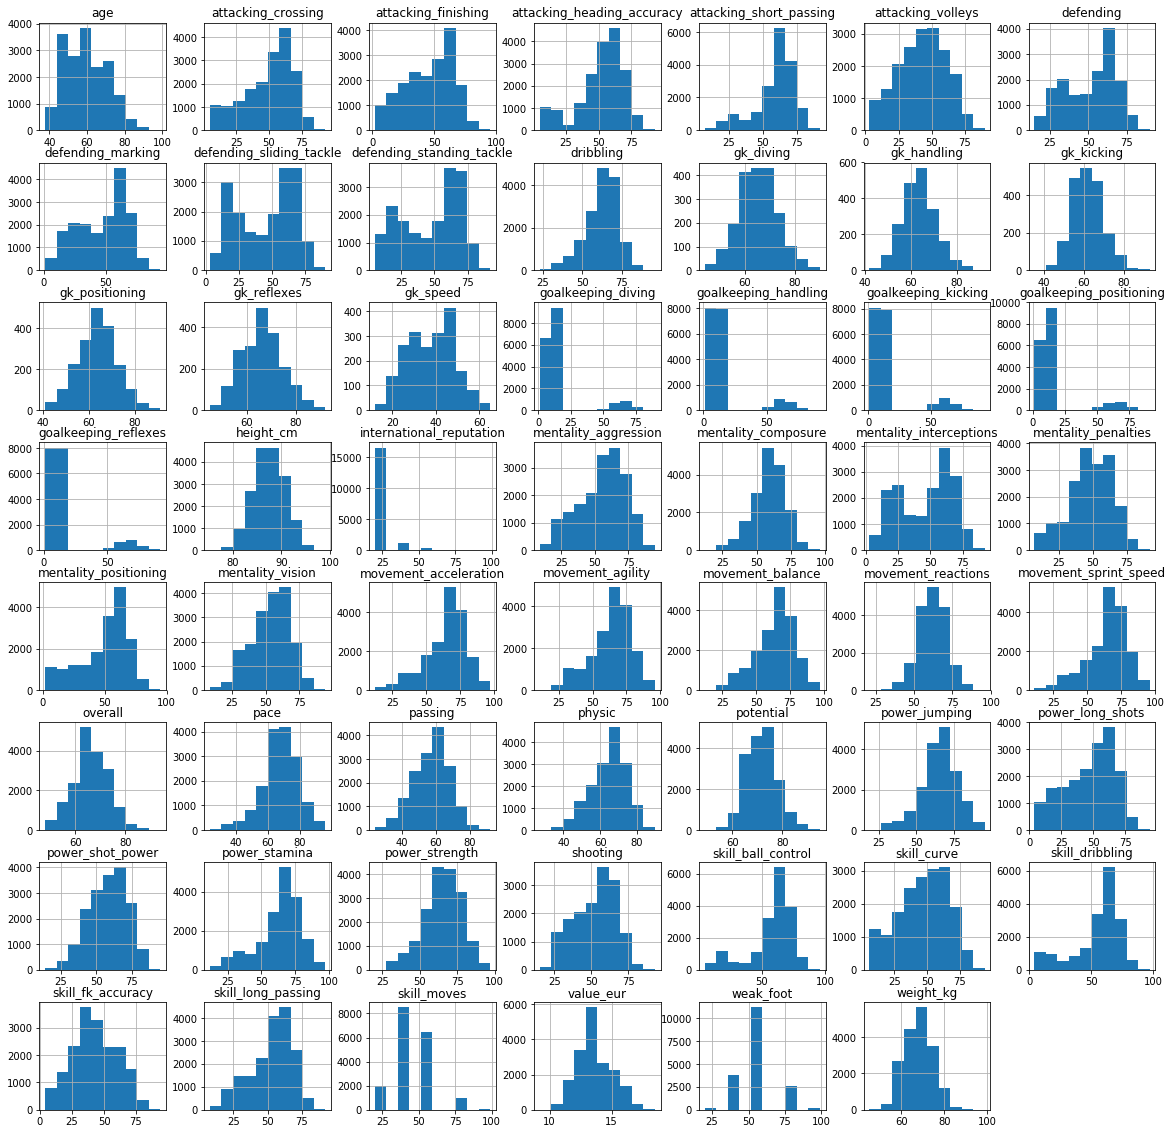

In [25]:
figure = plt.figure(figsize = (20,20))
ax = figure.gca()
DATA_FOR_CALC.hist(ax=ax)
plt.show()



In [26]:
print("we can see that that for most of the features the data is normally distributed, so we won't take logs, at leat yet. especially taking into account that we gona further separate our dataset on 4 parts depending on the foolballer amplua")

we can see that that for most of the features the data is normally distributed, so we won't take logs, at leat yet. especially taking into account that we gona further separate our dataset on 4 parts depending on the foolballer amplua


In [27]:
FORWARDS=DATA_FOR_CALC.loc[DATA_FOR_CALC['Player class'] == "FW"]


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


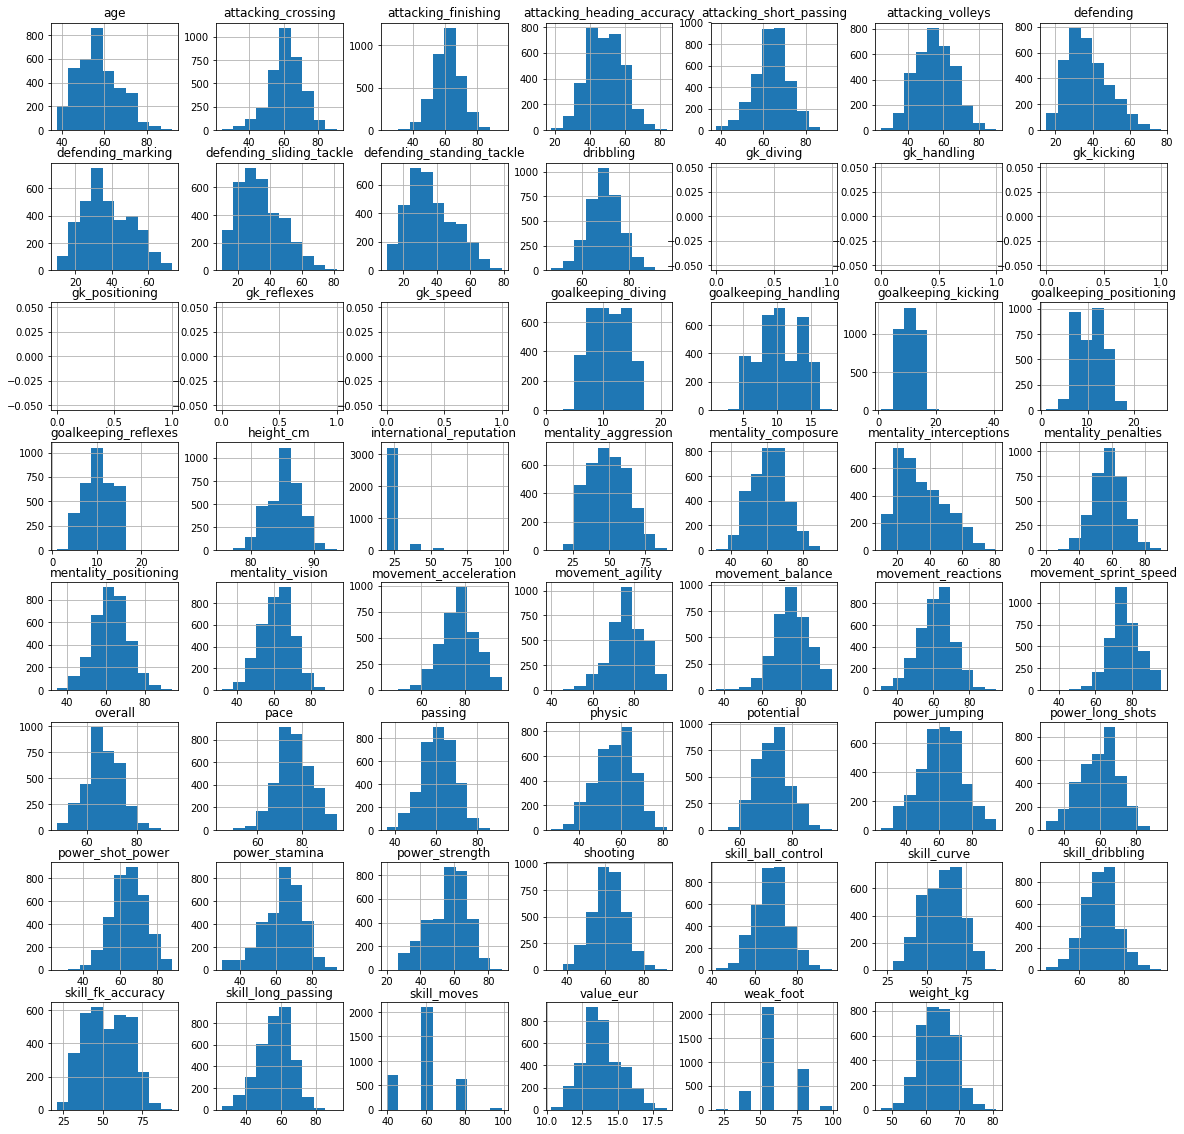

so we can see that the data for the all of forward's features is more or less normally distributed
However, we have to deal with missing values and 0-s


In [28]:
figure = plt.figure(figsize = (20,20))
ax = figure.gca()
FORWARDS.hist(ax=ax)
plt.show()

print("so we can see that the data for the all of forward's features is more or less normally distributed")
print('However, we have to deal with missing values and 0-s')

In [29]:
# I delete wage and any economic indicators

FORWARDS2=FORWARDS[['age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']]

In [30]:
FORWARDS2.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,international_reputation,weak_foot,skill_moves,pace,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,...,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000
mean,57.231537,85.131613,63.403422,66.554054,72.467798,13.887411,21.866532,62.832835,59.314606,76.535365,...,57.493387,61.106958,37.604658,36.289822,34.160150,10.418919,10.415756,10.466072,10.401668,10.397930
std,9.841311,2.565562,4.883309,6.854655,6.191784,1.370892,7.679993,12.980882,12.956890,7.922786,...,9.493914,9.618794,13.297479,13.934559,13.358595,3.042534,3.024719,3.102204,3.043254,3.033191
min,37.714286,75.336585,46.800000,48.000000,51.000000,10.308953,19.800000,19.800000,39.600000,44.000000,...,20.000000,32.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,49.500000,83.546341,60.300000,62.000000,68.000000,12.974134,19.800000,59.400000,59.400000,71.000000,...,51.000000,54.000000,27.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,56.571429,84.995122,63.000000,66.000000,72.000000,13.710150,19.800000,59.400000,59.400000,76.000000,...,58.000000,61.000000,36.000000,34.000000,32.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,63.642857,86.926829,66.600000,71.000000,76.000000,14.845130,19.800000,79.200000,59.400000,82.000000,...,64.000000,68.000000,48.000000,46.000000,43.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,91.928571,93.687805,81.000000,94.000000,95.000000,18.474222,99.000000,99.000000,99.000000,96.000000,...,90.000000,96.000000,73.000000,79.000000,82.000000,21.000000,18.000000,41.000000,26.000000,27.000000


In [31]:
#So here I found correlations with transfer values and different features. I am selecting all the features that have correlation 
#more than 0.5

FORWARDS2.corrwith(FORWARDS2['value_eur'])




ds=(FORWARDS2.corrwith(FORWARDS2['value_eur']))



ds2=pd.DataFrame(ds)


ds2


ds2=ds2.sort_values(0)

FW_CORS=ds2.loc[ds2[0]>=0.7]

FW_CORS



,0
power_shot_power,0.723011
attacking_crossing,0.732696
power_long_shots,0.743250
potential,0.746234
mentality_composure,0.779702
attacking_finishing,0.790550
mentality_vision,0.811221
movement_reactions,0.822053
mentality_positioning,0.833201
attacking_short_passing,0.840136


# Based on the correlation coefficients i am creating my x vector i will use for regressions.

In [32]:
FW_X=FORWARDS2[['power_shot_power',
'attacking_crossing',
'power_long_shots',
'potential',
'mentality_composure',
'attacking_finishing',
'mentality_vision',
'movement_reactions',
'mentality_positioning',
'attacking_short_passing',
'shooting',
'passing',
'skill_dribbling',
'skill_ball_control',
'dribbling',
'overall',
]]
FW_Y=FORWARDS2[["value_eur"]]


In [33]:
FW_X_train, FW_X_test, FW_Y_train, FW_Y_test = train_test_split(FW_X, FW_Y, test_size = 0.25, random_state=120)
regr = LinearRegression()
scores = cross_val_score(regr, FW_X_train, FW_Y_train, cv=10)
scores
FW_CV=np.mean(scores)
FW_CV


0.97595158404517246

In [35]:
#We run it just for experimental or educational purposes
#SIMPLE LINEAR REGRESSION


FW_X_train, FW_X_test, FW_Y_train, FW_Y_test = train_test_split(FW_X, FW_Y, test_size = 0.25, random_state=120)
regr = LinearRegression()
regr.fit(FW_X_train, FW_Y_train)
FW_Y_pred = regr.predict(FW_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(FW_Y_test, FW_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(FW_Y_test, FW_Y_pred))

print("So, our R-squared is very high, this model is very good")



Coefficients: 
 [[  9.10248509e-03  -2.79694072e-03   3.67750228e-03   5.22066884e-02
   -1.47594401e-03   1.32735426e-02   2.04798978e-03  -2.76679075e-03
   -1.76588551e-03   1.48252671e-04  -2.72948338e-02  -2.01496978e-03
    1.55648685e-03  -1.90621610e-03  -8.47940708e-04   1.77555619e-01]]
Mean squared error: 0.04
Variance score: 0.98
So, our R-squared is very high, this model is very good


In [36]:
MILD=DATA_FOR_CALC.loc[DATA_FOR_CALC['Player class'] == "MID"]

In [37]:
MILD

,age,Player class,height_cm,weight_kg,overall,potential,value_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
5,66.000000,MID,87.409756,63.0,91,91,18.315320,79.2,99.0,79.2,...,79,91,68,58,51,15,13,5,10,13
8,77.785714,MID,83.063415,59.4,90,90,17.622173,79.2,79.2,79.2,...,82,92,68,76,71,13,9,7,14,9
15,66.000000,MID,81.131707,64.8,89,90,18.005165,59.4,59.4,39.6,...,54,85,90,91,85,15,12,10,7,10
21,70.714286,MID,91.273171,68.4,89,89,17.822844,79.2,59.4,59.4,...,60,93,90,86,80,5,8,13,9,13
23,58.928571,MID,85.478049,67.5,88,92,18.152801,59.4,59.4,79.2,...,86,84,32,48,40,5,4,4,5,8
24,61.285714,MID,92.239024,75.6,88,91,18.099097,79.2,79.2,99.0,...,83,87,63,67,65,5,6,2,4,3
27,63.642857,MID,87.409756,68.4,88,89,18.035018,59.4,99.0,79.2,...,67,88,59,57,22,9,14,7,7,6
33,77.785714,MID,83.546341,60.3,88,88,17.399029,79.2,39.6,79.2,...,75,92,59,53,29,6,15,7,6,12
36,68.357143,MID,88.375610,68.4,88,88,17.858562,79.2,99.0,59.4,...,73,88,72,70,62,10,11,13,7,10
41,56.571429,MID,83.546341,57.6,87,90,17.974394,39.6,59.4,79.2,...,68,87,49,59,40,9,10,14,12,9


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


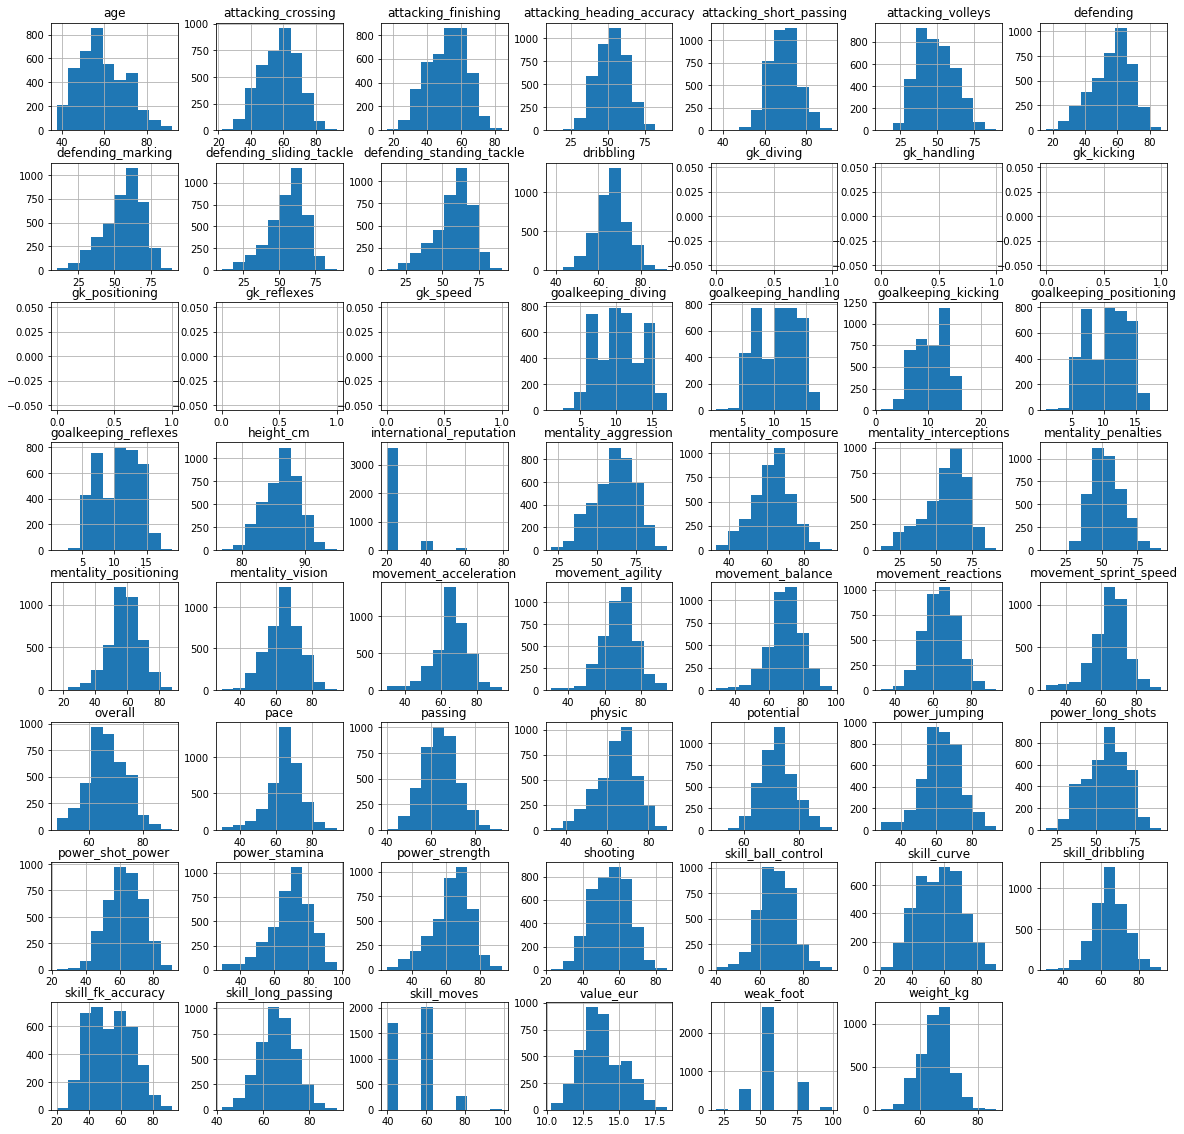

In [38]:
figure = plt.figure(figsize = (20,20))
ax = figure.gca()
MILD.hist(ax=ax)
plt.show()


In [39]:
# I delete wage and any economic indicators

MILD2=MILD[['age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']]

In [40]:
MILD2.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,international_reputation,weak_foot,skill_moves,pace,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,...,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000
mean,59.084377,86.364704,65.427341,66.773911,72.334502,13.840602,22.293590,61.001252,52.410015,65.231097,...,53.567852,62.965949,55.677266,58.054331,55.133200,10.362293,10.474712,10.429644,10.479219,10.483225
std,10.947625,2.741446,5.203904,7.216672,6.218637,1.436523,8.168815,12.299848,12.217151,9.282468,...,10.797224,10.354708,13.465291,13.116645,12.699607,3.102182,3.073437,3.053112,3.035427,3.050595
min,37.714286,76.785366,46.800000,48.000000,50.000000,10.308953,19.800000,19.800000,39.600000,30.000000,...,11.000000,33.000000,10.000000,12.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,49.500000,84.512195,62.100000,62.000000,68.000000,12.899220,19.800000,59.400000,39.600000,60.000000,...,45.000000,56.000000,47.000000,51.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,58.928571,86.443902,65.700000,67.000000,72.000000,13.623139,19.800000,59.400000,59.400000,66.000000,...,53.000000,63.000000,58.000000,60.000000,57.000000,10.000000,10.000000,10.000000,10.000000,11.000000
75%,66.000000,88.375610,68.400000,72.000000,76.000000,14.845130,19.800000,59.400000,59.400000,71.000000,...,61.000000,70.000000,65.000000,67.000000,64.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,91.928571,95.136585,86.400000,91.000000,92.000000,18.315320,79.200000,99.000000,99.000000,94.000000,...,92.000000,95.000000,90.000000,91.000000,90.000000,17.000000,19.000000,23.000000,19.000000,19.000000


In [41]:
#So here I found correlations with transfer values and different features. I am selecting all the features that have correlation 
#more than 0.5

MILD2.corrwith(MILD2['value_eur'])




ds_M=(MILD2.corrwith(MILD2['value_eur']))



ds2_M=pd.DataFrame(ds_M)


ds2_M


ds2_M=ds2_M.sort_values(0)

MILD_CORS=ds2_M.loc[ds2_M[0]>=0.7]

MILD_CORS



,0
shooting,0.720195
mentality_composure,0.767957
potential,0.783144
mentality_vision,0.791533
skill_dribbling,0.802959
skill_long_passing,0.817718
movement_reactions,0.823194
dribbling,0.850355
passing,0.858659
attacking_short_passing,0.879472


In [42]:
MILD_X=MILD2[['shooting',
'mentality_composure',
'potential',
'mentality_vision',
'skill_dribbling',
'skill_long_passing',
'movement_reactions',
'dribbling',
'passing',
'attacking_short_passing',
'skill_ball_control',
'overall']]
MILD_Y=MILD2[['value_eur']]



In [44]:
MILD_X_train, MILD_X_test, MILD_Y_train, MILD_Y_test = train_test_split(MILD_X, MILD_Y, test_size = 0.25, random_state=120)
regr = LinearRegression()
scores = cross_val_score(regr, MILD_X_train, MILD_Y_train, cv=10)
scores
MILD_CV=np.mean(scores)
MILD_CV

0.96379672026924168

In [45]:
MILD_X_train, MILD_X_test, MILD_Y_train, MILD_Y_test = train_test_split(MILD_X, MILD_Y, test_size = 0.3, random_state=120)
regr = LinearRegression()
regr.fit(MILD_X_train, MILD_Y_train)
MILD_Y_pred = regr.predict(MILD_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(MILD_Y_test, MILD_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(MILD_Y_test, MILD_Y_pred))

print("So, our R-squared is very high, this model is cool")


Coefficients: 
 [[ 0.00113237 -0.00707107  0.06020826  0.00315117  0.00458116  0.00106952
  -0.0013787   0.01436653 -0.01186521  0.01142705 -0.00990893  0.15636744]]
Mean squared error: 0.07
Variance score: 0.96
So, our R-squared is very high, this model is cool


In [46]:
DEFENDERS=DATA_FOR_CALC.loc[DATA_FOR_CALC['Player class'] == "DEF"]

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


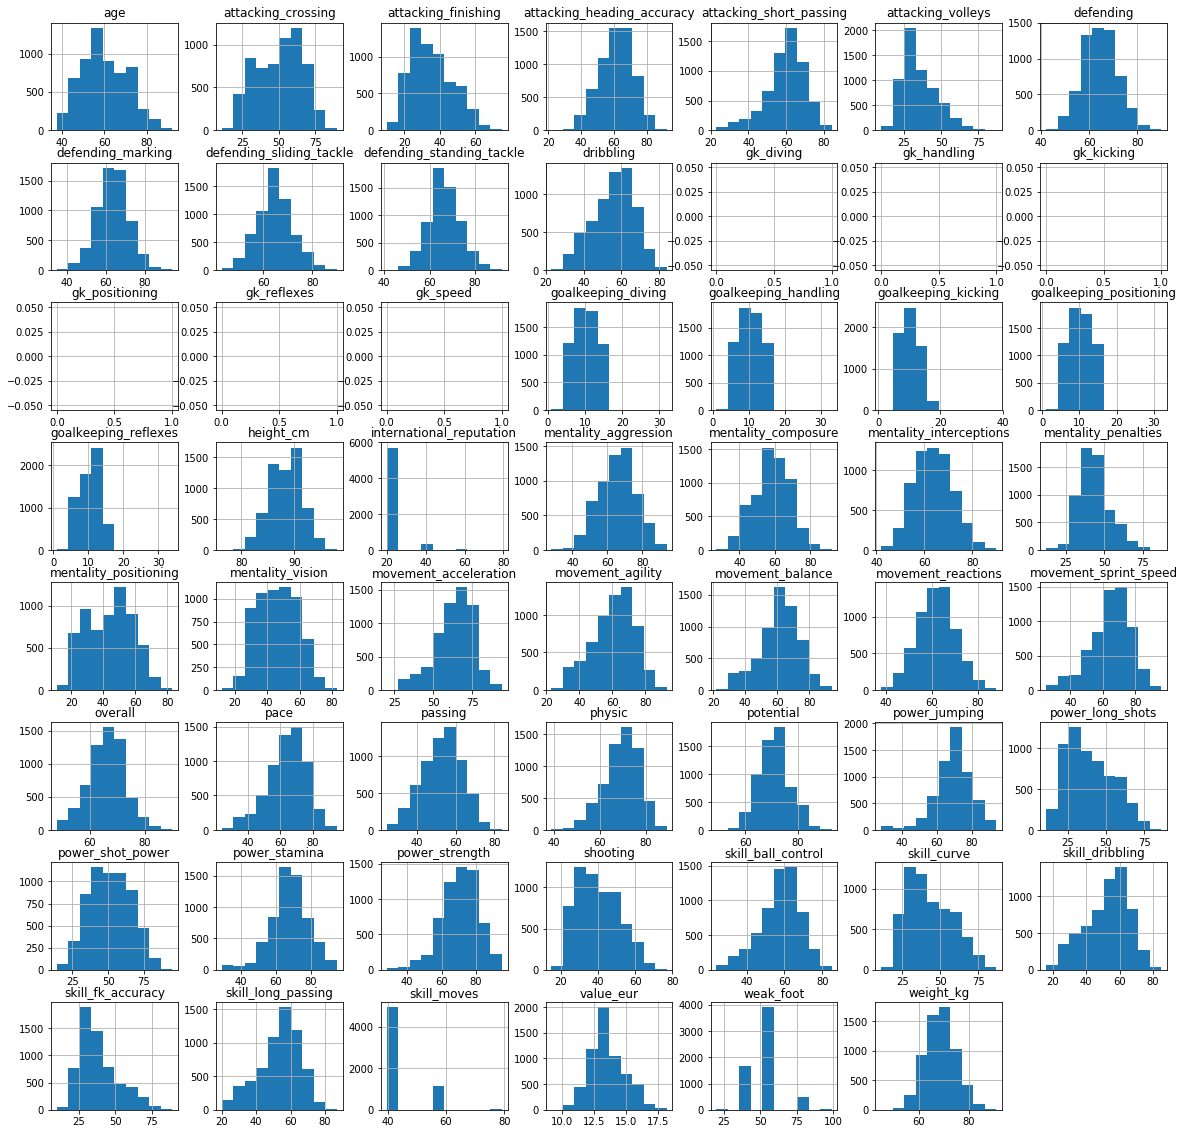

In [47]:
figure = plt.figure(figsize = (20,20))
ax = figure.gca()
DEFENDERS.hist(ax=ax)
plt.show()

In [48]:
DEF2=DEFENDERS[['age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']]

In [49]:
DEF2.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,international_reputation,weak_foot,skill_moves,pace,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,...,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000,6107.000000
mean,60.087265,88.265455,68.845653,66.100868,71.112166,13.572822,21.453512,55.713640,43.471164,64.157360,...,43.224005,58.152939,63.595546,66.498608,64.820861,10.485508,10.471917,10.462911,10.473882,10.468479
std,10.625049,3.006880,5.888154,6.583385,5.870563,1.316889,6.575464,11.790906,8.102715,11.770486,...,10.130346,10.126510,8.150816,6.971618,7.117930,3.023531,3.035383,3.075913,3.039013,3.046121
min,37.714286,76.302439,45.000000,48.000000,49.000000,9.210340,19.800000,19.800000,39.600000,24.000000,...,12.000000,27.000000,35.000000,41.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,51.857143,85.960976,64.800000,62.000000,67.000000,12.691580,19.800000,39.600000,39.600000,57.000000,...,36.000000,51.000000,58.000000,62.000000,60.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,58.928571,88.375610,68.400000,66.000000,71.000000,13.422468,19.800000,59.400000,39.600000,66.000000,...,42.000000,59.000000,64.000000,66.000000,64.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,68.357143,90.307317,72.900000,70.000000,75.000000,14.403297,19.800000,59.400000,39.600000,73.000000,...,49.000000,65.000000,69.000000,71.000000,70.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,91.928571,98.034146,90.900000,90.000000,93.000000,18.172219,79.200000,99.000000,79.200000,95.000000,...,87.000000,92.000000,94.000000,92.000000,90.000000,32.000000,33.000000,38.000000,32.000000,34.000000


In [50]:
#So here I found correlations with transfer values and different features. I am selecting all the features that have correlation 
#more than 0.5

DEF2.corrwith(DEF2['value_eur'])




ds_D=(DEF2.corrwith(DEF2['value_eur']))



ds2_D=pd.DataFrame(ds_D)


ds2_D


ds2_D=ds2_D.sort_values(0)

DEF_CORS=ds2_D.loc[ds2_D[0]>=0.7]

DEF_CORS

,0
attacking_short_passing,0.700263
mentality_composure,0.733906
potential,0.796138
movement_reactions,0.799823
defending_marking,0.822769
mentality_interceptions,0.848270
defending_sliding_tackle,0.853941
defending_standing_tackle,0.873966
defending,0.897241
overall,0.943153


In [51]:
DEF_X=DEF2[[
'attacking_short_passing',
'mentality_composure',
'potential',
'movement_reactions',
'defending_marking',
'mentality_interceptions',
'defending_sliding_tackle',
'defending_standing_tackle',
'defending',
'overall']]
    
DEF_Y=DEF2[['value_eur']]

In [52]:
DEF_X_train, DEF_X_test, DEF_Y_train, DEF_Y_test = train_test_split(DEF_X, DEF_Y, test_size = 0.25, random_state=120)
regr = LinearRegression()
scores = cross_val_score(regr, DEF_X_train, DEF_Y_train, cv=10)
scores
DEF_CV=np.mean(scores)
DEF_CV

0.95199585777881135

In [53]:
DEF_X_train, DEF_X_test, DEF_Y_train, DEF_Y_test = train_test_split(DEF_X, DEF_Y, test_size = 0.2, random_state=120)
regr = LinearRegression()
regr.fit(DEF_X_train, DEF_Y_train)
DEF_Y_pred = regr.predict(DEF_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(DEF_Y_test, DEF_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(DEF_Y_test, DEF_Y_pred))

print("So, our R-squared is very high, this model is almost ideal")


Coefficients: 
 [[-0.00056665 -0.00486274  0.06960775  0.00047018  0.00057145  0.002337
   0.00455685  0.01475814 -0.02767343  0.16162978]]
Mean squared error: 0.09
Variance score: 0.95
So, our R-squared is very high, this model is almost ideal


In [54]:
GKS=DATA_FOR_CALC.loc[DATA_FOR_CALC['Player class'] == "GK"]

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


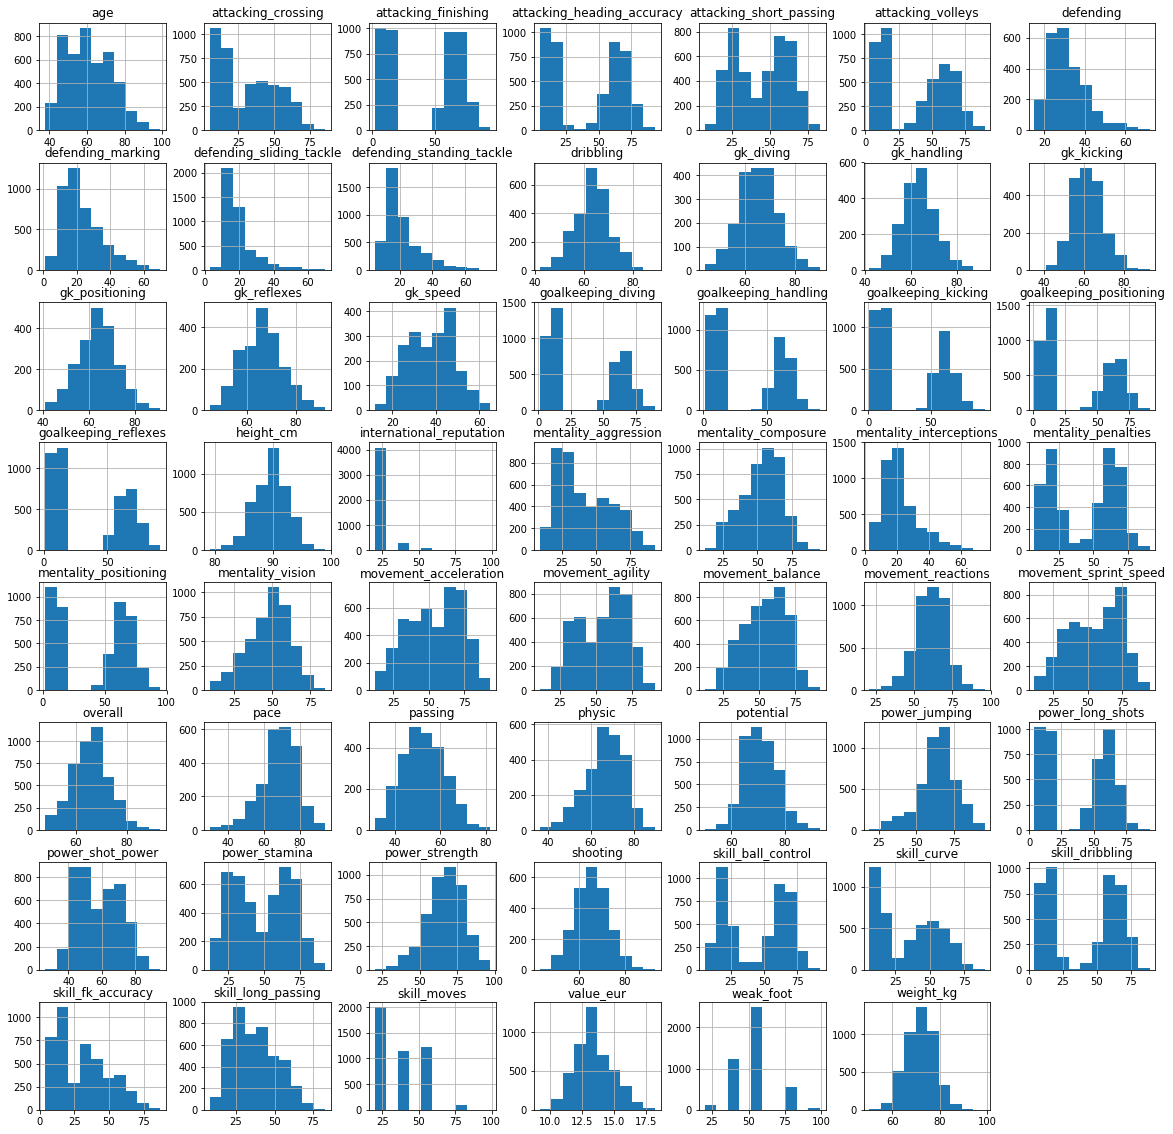

In [55]:
figure = plt.figure(figsize = (20,20))
ax = figure.gca()
GKS.hist(ax=ax)
plt.show()

In [56]:
GKS2=GKS[['age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']]

In [57]:
GKS2.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,international_reputation,weak_foot,skill_moves,pace,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,2453.000000,...,4449.000000,4449.000000,4449.000000,4449.000000,4449.00000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,60.685965,89.661786,71.672893,65.568218,70.767588,13.447193,21.918409,55.759541,36.943088,68.140236,...,43.636997,52.909643,23.079344,21.220724,19.56597,35.062036,34.134187,33.577433,34.176219,35.589571
std,11.798424,2.800010,5.999490,7.224582,6.224944,1.448602,7.860756,14.323102,17.581012,10.298081,...,23.081888,14.338734,12.246210,11.204537,9.78796,27.902229,26.654771,26.054011,26.965388,28.358694
min,37.714286,79.200000,50.400000,48.000000,50.000000,9.210340,19.800000,19.800000,19.800000,30.000000,...,7.000000,12.000000,1.000000,5.000000,3.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,51.857143,87.892683,67.500000,61.000000,66.000000,12.429216,19.800000,39.600000,19.800000,62.000000,...,20.000000,44.000000,14.000000,13.000000,13.00000,10.000000,10.000000,10.000000,10.000000,10.000000
50%,58.928571,89.824390,72.000000,65.000000,70.000000,13.345507,19.800000,59.400000,39.600000,69.000000,...,53.000000,55.000000,20.000000,18.000000,17.00000,15.000000,15.000000,15.000000,15.000000,15.000000
75%,68.357143,91.756098,75.600000,70.000000,75.000000,14.285514,19.800000,59.400000,59.400000,75.000000,...,64.000000,63.000000,30.000000,25.000000,22.00000,64.000000,62.000000,60.000000,62.000000,65.000000
max,99.000000,99.000000,99.000000,93.000000,93.000000,18.234351,99.000000,99.000000,99.000000,94.000000,...,91.000000,95.000000,70.000000,75.000000,70.00000,90.000000,92.000000,93.000000,91.000000,92.000000


In [58]:
#So here I found correlations with transfer values and different features. I am selecting all the features that have correlation 
#more than 0.5

GKS2.corrwith(GKS2['value_eur'])




ds_G=(GKS2.corrwith(GKS2['value_eur']))



ds2_G=pd.DataFrame(ds_G)


ds2_G


ds2_G=ds2_G.sort_values(0)

GK_CORS=ds2_G.loc[ds2_G[0]>=0.7]

GK_CORS

,0
passing,0.708193
gk_kicking,0.728974
potential,0.789974
movement_reactions,0.797655
gk_positioning,0.836427
dribbling,0.847073
gk_handling,0.851394
gk_diving,0.898504
gk_reflexes,0.904845
shooting,0.911590


In [60]:
GK_X=GKS2[[
'passing',
'gk_kicking',
'potential',
'movement_reactions',
'gk_positioning',
'dribbling',
'gk_handling',
'gk_diving',
'gk_reflexes',
'shooting',
'overall'
]]

GK_Y=GKS2[[
'value_eur']  
]

In [61]:
GK_X.describe

<bound method NDFrame.describe of        passing  gk_kicking  potential  movement_reactions  gk_positioning  \
1         82.0         NaN         93                  96             NaN   
3          NaN        78.0         93                  88            90.0   
6          NaN        88.0         93                  86            88.0   
12        79.0         NaN         91                  91             NaN   
13         NaN        85.0         91                  88            90.0   
14         NaN        81.0         90                  87            85.0   
17        77.0         NaN         89                  92             NaN   
19        80.0         NaN         89                  92             NaN   
20        74.0         NaN         89                  90             NaN   
25         NaN        93.0         91                  87            86.0   
28         NaN        72.0         89                  83            85.0   
30         NaN        69.0         88     

In [62]:
# here when trying to run the code the program claimed about the issues, 
#so i had to solve the problems with missing values
GK_X=GK_X.fillna(GK_X.mean())

In [63]:
GK_X.describe

<bound method NDFrame.describe of         passing  gk_kicking  potential  movement_reactions  gk_positioning  \
1      82.00000   61.787575         93                  96       63.286573   
3      52.73828   78.000000         93                  88       90.000000   
6      52.73828   88.000000         93                  86       88.000000   
12     79.00000   61.787575         91                  91       63.286573   
13     52.73828   85.000000         91                  88       90.000000   
14     52.73828   81.000000         90                  87       85.000000   
17     77.00000   61.787575         89                  92       63.286573   
19     80.00000   61.787575         89                  92       63.286573   
20     74.00000   61.787575         89                  90       63.286573   
25     52.73828   93.000000         91                  87       86.000000   
28     52.73828   72.000000         89                  83       85.000000   
30     52.73828   69.000000   

In [64]:
GK_X_train, GK_X_test, GK_Y_train, GK_Y_test = train_test_split(GK_X, GK_Y, test_size = 0.25, random_state=120)
regr = LinearRegression()
scores = cross_val_score(regr, GK_X_train, GK_Y_train, cv=10)
scores
GK_CV=np.mean(scores)
GK_CV

0.93417819069543795

In [65]:
GK_X_train, GK_X_test, GK_Y_train, GK_Y_test = train_test_split(GK_X, GK_Y, test_size = 0.3, random_state=120)
regr = LinearRegression()
regr.fit(GK_X_train, GK_Y_train)
GK_Y_pred = regr.predict(GK_X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(GK_Y_test, GK_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(GK_Y_test, GK_Y_pred))

print("So, our R-squared is very high, this model is cool")


Coefficients: 
 [[-0.00449645 -0.00632387  0.06856032 -0.0046238  -0.04338246 -0.01246394
  -0.01370043 -0.01573698 -0.00048994 -0.0451988   0.2226508 ]]
Mean squared error: 0.16
Variance score: 0.92
So, our R-squared is very high, this model is cool


In [66]:
CV_AVERAGE=np.mean([FW_CV,MILD_CV,DEF_CV,GK_CV])

In [70]:
print("So our average Cross validation score for linear model is ", CV_AVERAGE)
print("We run the cross validation on the training set only, because when we run it on the full set we were not able to get realistic r2 score")
print("The average r2 for linear model is around 0.95 which is very good (see below). ANN gives better results even we had a truobles with a code to find cross validation score for it")

So our average Cross validation score for linear model is  0.956480588197
We run the cross validation on the training set only, because when we run it on the full set we were not able to get realistic r2 score
The average r2 for linear model is around 0.95 which is very good (see below). ANN gives better results even we had a truobles with a code to find cross validation score for it


In [71]:
R2AVERAGE=0.92+0.95+0.96+0.98
R2AVERAGE=R2AVERAGE/4
R2AVERAGE

0.9525